##Emotion detection:
https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer

Tamaño: 35.9k



*   Train: 24.282
    * Angry: 3995
    * Disgusted: 436
    * Fearful: 4097
    * Happy: 7215
    * Neutral: 4965
    * Sad: 4830
    * surprised: 3171

*   Test: 7178








#Importar librerias

In [ ]:

import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


In [3]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt




In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "Proyecto IA" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1RJdbXAWiwID162JN0IevNCxkN1GB4qOj/Proyecto IA


#Conectar con kaggle (despues de ejecutarse una vez ya no es necesario)

In [ ]:
!pip install kaggle

In [ ]:
ruta_del_archivo = "/content/drive/MyDrive/Proyecto IA/kaggle.json"

with open(ruta_del_archivo) as f:
  # hacer algo con el archivo, como imprimir su contenido
  print(f.read())

{"username":"carlosg0328","key":"47e18ba5eb4c048c4556b9bab3b8f6dd"}


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:

!kaggle datasets download -d ananthu017/emotion-detection-fer

emotion-detection-fer.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = "emotion-detection-fer.zip"
with ZipFile(file_name,"r") as zip:
  zip.extractall()
  print("done")


#Cargar el dataset

In [ ]:
import os
import cv2
import numpy as np

def cargar_dataset(ruta_dataset):
    imagenes = []
    etiquetas = []

    # Ruta completa de la carpeta "train"
    ruta_train = os.path.join('/content/drive/MyDrive', ruta_dataset, 'train')

    for nombre_clase in os.listdir(ruta_train):
        carpeta_clase = os.path.join(ruta_train, nombre_clase)
        if not os.path.isdir(carpeta_clase):
            continue

        for nombre_archivo in os.listdir(carpeta_clase):
            archivo = os.path.join(carpeta_clase, nombre_archivo)
            imagen = cv2.imread(archivo, cv2.IMREAD_GRAYSCALE)

            if imagen is not None:
                imagenes.append(imagen)
                etiquetas.append(nombre_clase)

    # Ruta completa de la carpeta "test"
    ruta_test = os.path.join('/content/drive/MyDrive', ruta_dataset, 'test')

    for nombre_clase in os.listdir(ruta_test):
        carpeta_clase = os.path.join(ruta_test, nombre_clase)
        if not os.path.isdir(carpeta_clase):
            continue

        for nombre_archivo in os.listdir(carpeta_clase):
            archivo = os.path.join(carpeta_clase, nombre_archivo)
            imagen = cv2.imread(archivo, cv2.IMREAD_GRAYSCALE)

            if imagen is not None:
                imagenes.append(imagen)
                etiquetas.append(nombre_clase)

    return np.array(imagenes), np.array(etiquetas)

ruta_dataset = "/content/drive/MyDrive/Proyecto IA"  # Reemplaza con la ruta real de tu dataset en Google Drive

imagenes, etiquetas = cargar_dataset(ruta_dataset)

# Verificar el tamaño del dataset
print("Número de imágenes:", len(imagenes))
print("Número de etiquetas:", len(etiquetas))




Número de imágenes: 35659
Número de etiquetas: 35659


In [ ]:
from joblib import dump
from joblib import load
imagenes, etiquetas= load('/content/drive/MyDrive/Proyecto IA/ConjuntosDatos/dataset1.pkl')
print("Número de imágenes:", len(imagenes))
print("Número de etiquetas:", len(etiquetas))

Número de imágenes: 35660
Número de etiquetas: 35660


##Guardar los datos:

In [ ]:
from joblib import dump

# Guardar el conjunto de datos en un archivo
dump((imagenes, etiquetas), '/content/drive/MyDrive/Proyecto IA/ConjuntosDatos/dataset1.pkl')

# Cargar el conjunto de datos desde el archivo
#imagenes_cargadas, etiquetas_cargadas = joblib.load('/content/drive/MyDrive/Proyecto IA/ConjuntosDatos/dataset.pkl')

['/content/drive/MyDrive/Proyecto IA/ConjuntosDatos/dataset1.pkl']

In [ ]:
from sklearn.model_selection import train_test_split

# Separar el 10% de los datos en una nueva variable
datos, datosV, etiquetas, etiquetasV = train_test_split(imagenes, etiquetas, test_size=0.1, random_state=42)

# Verificar el tamaño de los conjuntos de datos
print("Tamaño del conjunto de datos:", len(datos))
print("Tamaño del conjunto de validación:", len(datosV))


Tamaño del conjunto de datos: 32094
Tamaño del conjunto de validación: 3566


In [ ]:
from joblib import dump

# Guardar el conjunto de datos en un archivo
dump((datos, datosV, etiquetas, etiquetasV), '/content/drive/MyDrive/Proyecto IA/ConjuntosDatos/dataset1.pkl')


['/content/drive/MyDrive/Proyecto IA/ConjuntosDatos/datasetV.pkl']

#Visualizar datos

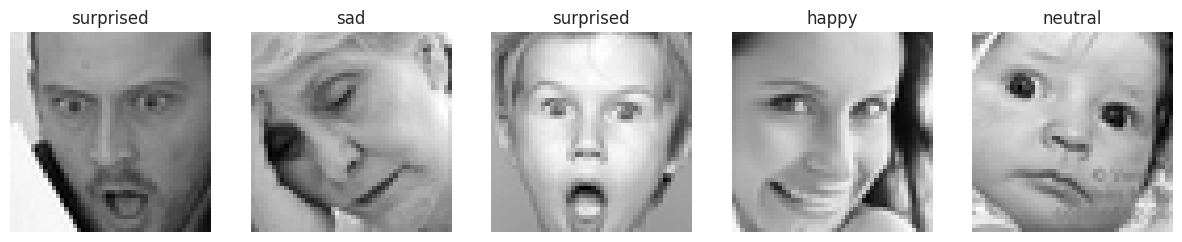

In [ ]:
import matplotlib.pyplot as plt

def visualizar_imagenes(imagenes, etiquetas, num_imagenes):
    clases = np.unique(etiquetas)

    fig, axs = plt.subplots(1, num_imagenes, figsize=(15, 5))

    for i in range(num_imagenes):
        indice = np.random.randint(0, len(imagenes))
        imagen = imagenes[indice]
        etiqueta = etiquetas[indice]

        axs[i].imshow(imagen, cmap='gray')
        axs[i].set_title(etiqueta)
        axs[i].axis('off')

    plt.show()

num_imagenes_visualizar = 5  # Número de imágenes a visualizar
visualizar_imagenes(imagenes, etiquetas, num_imagenes_visualizar)
